In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# read in CC_baseline_header.csv
CC_baseline = pd.read_csv('../Data/baseline_model/CC_baseline_header.csv')

# get head of df
print(CC_baseline.head())


          DOM  SQFT  BEDS  BATHS  AGE  zip_cluster
0  854.905586  1368     2    2.0    3       2474.0
1  658.000000  1850     2    2.5    5       2124.0
2  467.000000  1469     2    1.0   38       2184.0
3  565.000000  2945     2    2.5    4       1949.0
4   56.000000  2536     3    2.5    3       2139.0


(array([90., 79., 38., 34., 44., 26.,  8., 24., 13., 10.,  8.,  4.,  8.,
         5.,  4.,  7.,  3.,  4.,  0.,  3.,  0.,  1.,  3.,  4.,  7.,  1.,
         1.,  0.,  0.,  0.]),
 array([ 200.        ,  226.66666667,  253.33333333,  280.        ,
         306.66666667,  333.33333333,  360.        ,  386.66666667,
         413.33333333,  440.        ,  466.66666667,  493.33333333,
         520.        ,  546.66666667,  573.33333333,  600.        ,
         626.66666667,  653.33333333,  680.        ,  706.66666667,
         733.33333333,  760.        ,  786.66666667,  813.33333333,
         840.        ,  866.66666667,  893.33333333,  920.        ,
         946.66666667,  973.33333333, 1000.        ]),
 <BarContainer object of 30 artists>)

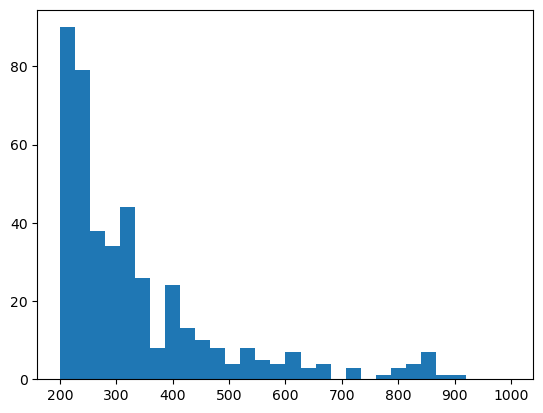

In [8]:
# show histogram of DOM, with 30 bins starting at 400 and ending at max
plt.hist(CC_baseline['DOM'], bins=30, range=(200, 1000))


In [9]:
# get the 95th percentile of DOM
print(np.percentile(CC_baseline['DOM'], 95))

# save the 95th percentile value to a variable
long_tail_threshold = np.percentile(CC_baseline['DOM'], 95)

# represent values above the 95th percentile as the 95th percentile value + log(DOM). this should be a min comparison between original value and the transformed value.
CC_baseline['DOM'] = np.minimum(CC_baseline['DOM'], long_tail_threshold + (10 * np.log(CC_baseline['DOM'])))


175.0


/Users/bermo/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


1.0
243.0371911850126


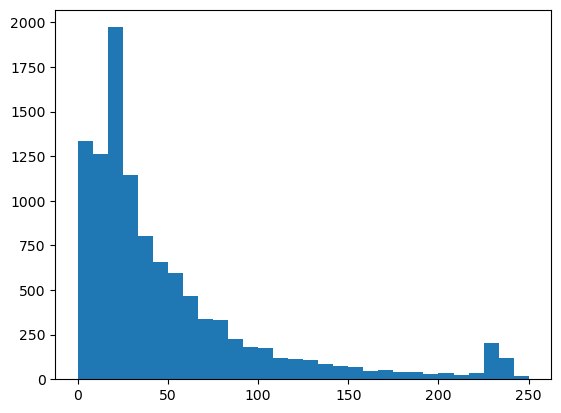

In [10]:
# show histogram of DOM again
plt.hist(CC_baseline['DOM'], bins=30, range=(0, 250))

# get min and max of DOM
print(CC_baseline['DOM'].min())
print(CC_baseline['DOM'].max())

In [11]:
# write back to the original file
CC_baseline.to_csv('../Data/baseline_model/CC_baseline_header_long_tail.csv', index=False)

# write no header version to a new file
CC_baseline.to_csv('../Data/baseline_model/CC_baseline_no_header_long_tail.csv', index=False, header=False)

